Определять надо параметры:

    Type
    Finish1
    Treatment
    Hanging Method
    Shade Color
    Shade Shape
    Tier
    Style

Product title - можно использовать в помощь и какие-то атрибуты, возможно, определять по нему, а не по изображению.

In [1]:
from __future__ import division, unicode_literals

import pandas as pd
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

In [13]:
train = pd.read_csv('product_attributes.csv', encoding='utf-8', 
                    dialect='excel', lineterminator='\r')
train.tail(30)

,ProductID,EID,PID,VID,Department,Category,Type,Product Title,Finish1,Treatment,Hanging Method,Shade Color,Shade Shape,Style1,Style2,Style3,Tier
34307,\nP994209,430656.0,P994209,46017/1,Ceiling Lights,Mini-Pendant Lights,Mini-Pendant Lights,Mini-Pendant Light with Clear Glass,Chrome,Polished,Cord Hung,Clear,Oval,Transitional,Contemporary / Modern,NaN,NaN
34308,\nP994210,460029.0,P994210,46017/3,Ceiling Lights,Mini-Pendant Lights,Multi-Light Pendants,Multi-Light Pendant Light with Clear Glass and...,Chrome,Polished,Cord Hung,Clear,Oval,Transitional,Contemporary / Modern,NaN,NaN
34309,\nP994211,431937.0,P994211,46017/3L,Ceiling Lights,Mini-Pendant Lights,Multi-Light Pendants,Multi-Light Pendant Light with Clear Glass and...,Chrome,Polished,Cord Hung,Clear,Oval,Transitional,Contemporary / Modern,NaN,NaN
34310,\nP994212,443578.0,P994212,46017/6RC,Ceiling Lights,Mini-Pendant Lights,Multi-Light Pendants,Multi-Light Pendant Light with Clear Glass and...,Chrome,Polished,Cord Hung,Clear,Oval,Transitional,Contemporary / Modern,NaN,NaN
34311,\nP994213,463528.0,P994213,46018/1,Ceiling Lights,Mini-Pendant Lights,Mini-Pendant Lights,Mini-Pendant Light with Clear Glass,Chrome,Polished,Cord Hung,Clear,Bowl / Dome,Transitional,Contemporary / Modern,NaN,NaN
34312,\nP994214,429880.0,P994214,46018/3,Ceiling Lights,Mini-Pendant Lights,Multi-Light Pendants,Multi-Light Pendant Light with Clear Glass and...,Chrome,Polished,Cord Hung,Clear,Bowl / Dome,Transitional,Contemporary / Modern,NaN,NaN
34313,\nP994215,NaN,P994215,46018/3L,Ceiling Lights,Mini-Pendant Lights,Multi-Light Pendants,Multi-Light Pendant Light with Clear Glass and...,Chrome,Polished,Cord Hung,Clear,Bowl / Dome,Transitional,Contemporary / Modern,NaN,NaN
34314,\nP994216,NaN,P994216,46018/6RC,Ceiling Lights,Mini-Pendant Lights,Multi-Light Pendants,Multi-Light Pendant Light with Clear Glass and...,Chrome,Polished,Cord Hung,Clear,Bowl / Dome,Transitional,Contemporary / Modern,NaN,NaN
34315,\nP994217,477313.0,P994217,14121/1,Ceiling Lights,Mini-Pendant Lights,Mini-Pendant Lights,Mini-Pendant Light with Clear Glass,Bronze / Brown Tones,Oil Rubbed,Stem Hung,Clear,Rectangle,Transitional,Contemporary / Modern,NaN,NaN
34316,\nP994218,NaN,P994218,14121/1-LA,Ceiling Lights,Mini-Pendant Lights,Mini-Pendant Lights,Mini-Pendant Light with Clear Glass in Oiled B...,Bronze / Brown Tones,Oil Rubbed,Stem Hung,Clear,Rectangle,Transitional,Contemporary / Modern,NaN,NaN


In [4]:
train.describe(include=['O'])

,ProductID,PID,VID,Department,Category,Type,Product Title,Finish1,Treatment,Hanging Method,Shade Color,Shade Shape,Style1,Style2,Style3
count,34337,30855,34336,34336,34336,34281,34334,33594,17883,12570,33343,24480,33422,14283,2252
unique,34337,30850,34328,5,30,80,12659,24,21,5,33,20,26,26,26
top,\nP928445,P361673,203-09,Ceiling Lights,Sconces,Sconces,Modern Bathroom Light with White Glass in Sati...,Bronze / Brown Tones,Satin,Chain Hung,White Tones,Bowl / Dome,Contemporary / Modern,Transitional,Transitional
freq,1,2,2,16216,4249,4231,227,11728,4304,5334,12421,5768,13808,2547,421


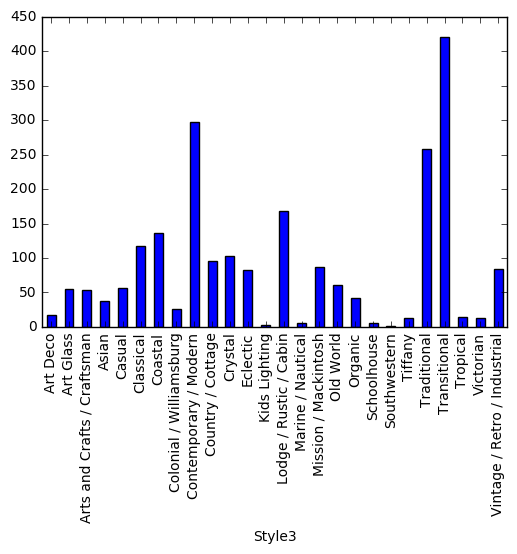

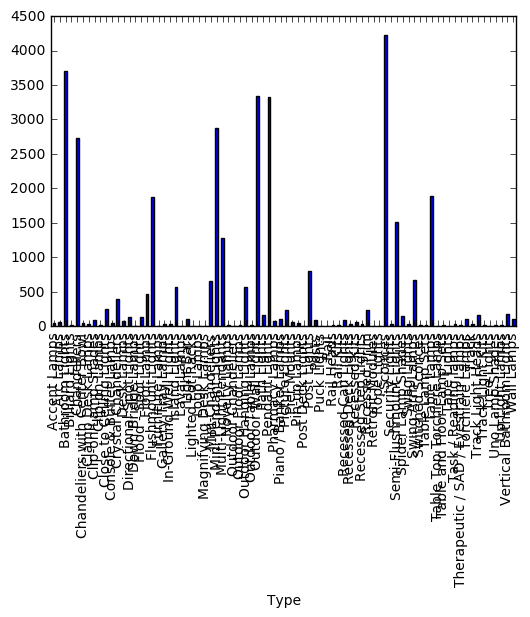

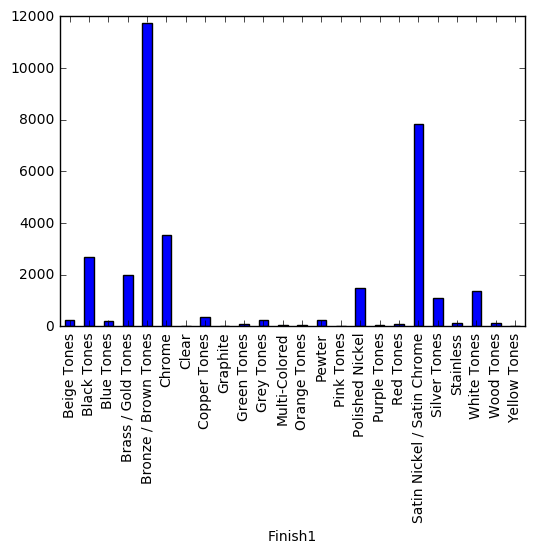

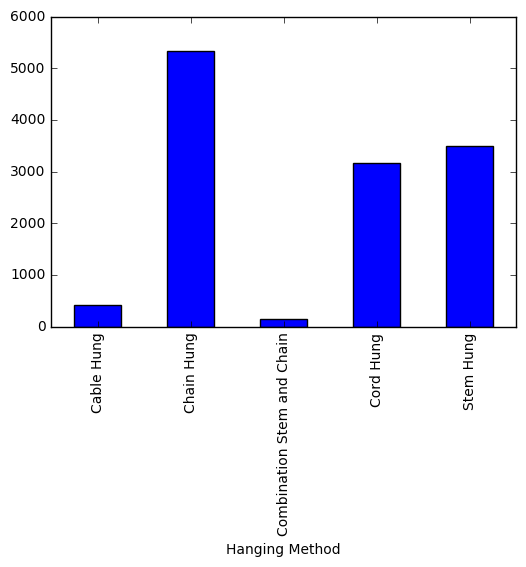

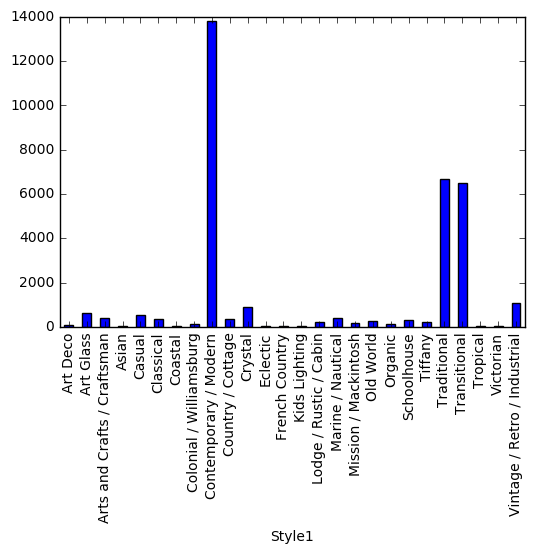

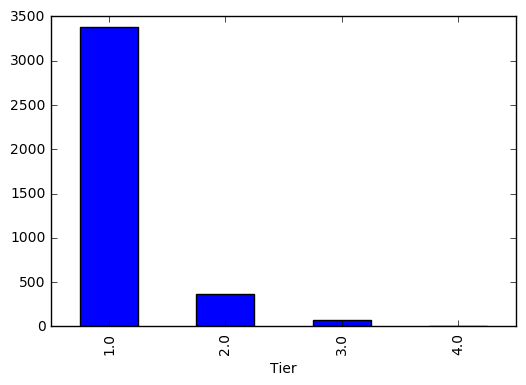

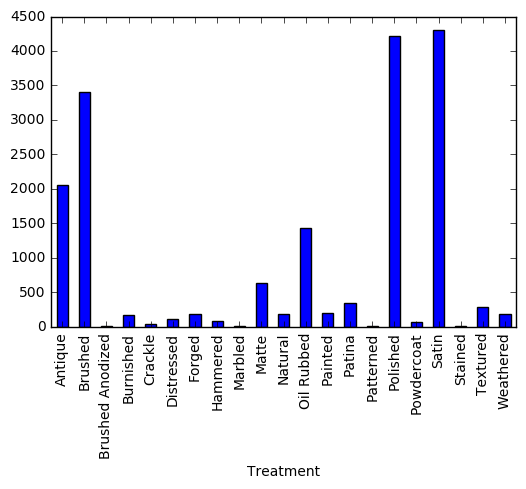

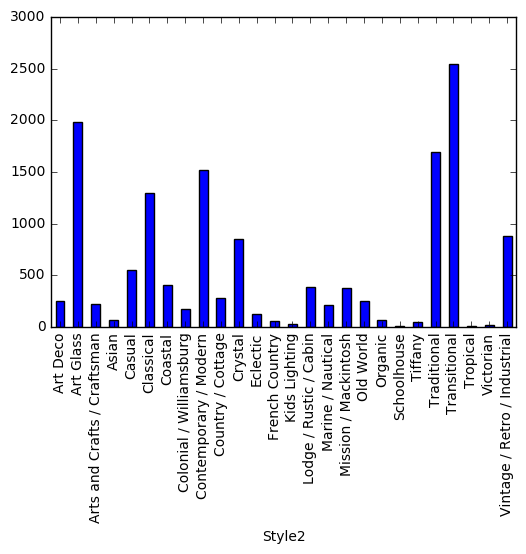

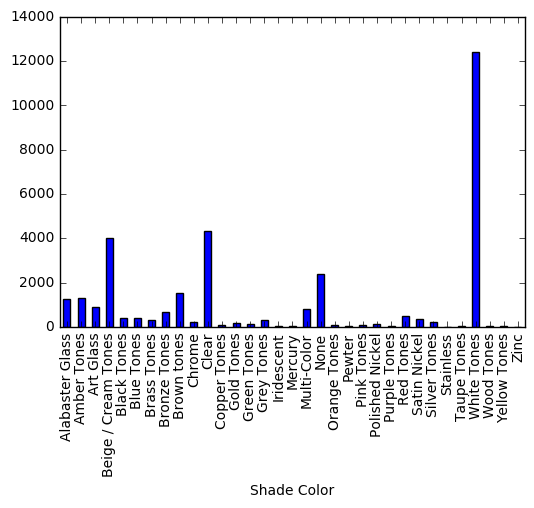

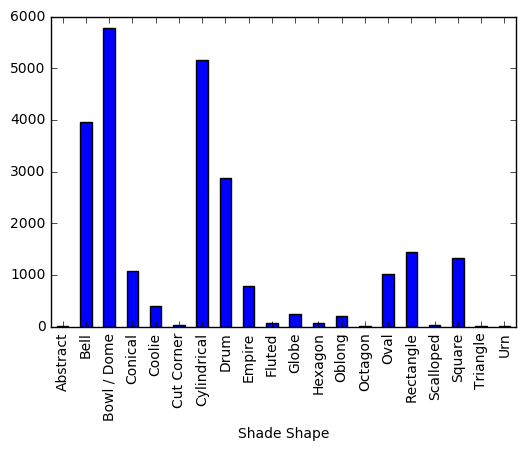

In [14]:
excess_columns=set(["ProductID","EID","PID","VID","Department","Product Title","Category"])
train_researsh_columns=set(train.columns)-excess_columns
for ColumnName in train_researsh_columns: 
    Column=train[ColumnName] # train[ColumnIndex] не работает с groupby
    Column.groupby(Column).count().plot(kind="bar")
    plt.show()

1.0    3378
2.0     364
3.0      72
4.0       3
Name: Tier, dtype: int64


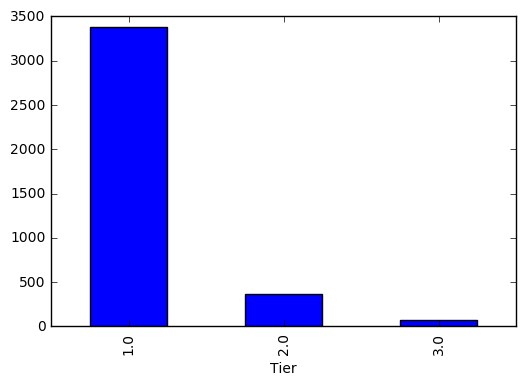

In [15]:
def delete_rare_records(treshold):
    global train
    e = train['Tier'].value_counts()
    train=train[train['Tier'].isin(e[e>treshold].index)]
delete_rare_records(5)
Column=train[train.columns[16]] 
Column.groupby(Column).count().plot(kind="bar")
plt.show()

In [6]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

Using TensorFlow backend.


In [ ]:
создание модели

In [ ]:
img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
metrics=['accuracy'])

как мы будем тренировать

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('first_try.h5')